<a href="https://colab.research.google.com/github/sindhusonti/Web-Scraping/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Corrected URL
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Fetching tables from the webpage
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
)

# Checking the number of tables
print(len(tables))


2


In [6]:
print(f"Number of tables found: {len(tables)}")

Number of tables found: 2


In [7]:
sp500_table = tables[0]

In [8]:
print(sp500_table.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [9]:
sp500_table.to_csv('sp500_companies.csv', index=False)
print("S&P 500 companies data saved to 'sp500_companies.csv'")

S&P 500 companies data saved to 'sp500_companies.csv'


In [10]:
df = pd.read_csv('sp500_companies.csv')
print(df.head())  # Display the first few rows

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [11]:
tech_companies = df[df['GICS Sector'] == 'Information Technology']
print(tech_companies)

    Symbol                Security             GICS Sector  \
4      ACN               Accenture  Information Technology   
5     ADBE              Adobe Inc.  Information Technology   
6      AMD  Advanced Micro Devices  Information Technology   
12    AKAM     Akamai Technologies  Information Technology   
33     APH                Amphenol  Information Technology   
..     ...                     ...                     ...   
454    TYL      Tyler Technologies  Information Technology   
469   VRSN                Verisign  Information Technology   
491    WDC         Western Digital  Information Technology   
495   WDAY           Workday, Inc.  Information Technology   
500   ZBRA      Zebra Technologies  Information Technology   

                              GICS Sub-Industry     Headquarters Location  \
4                IT Consulting & Other Services           Dublin, Ireland   
5                          Application Software      San Jose, California   
6                       

In [12]:
sector_counts = df['GICS Sector'].value_counts()
print(sector_counts)


GICS Sector
Industrials               78
Financials                73
Information Technology    69
Health Care               61
Consumer Discretionary    50
Consumer Staples          38
Utilities                 31
Real Estate               31
Materials                 28
Communication Services    22
Energy                    22
Name: count, dtype: int64


In [13]:
symbol = 'AAPL'  # Example: Apple Inc.
company_info = df[df['Symbol'] == symbol]
print(company_info)

   Symbol    Security             GICS Sector  \
39   AAPL  Apple Inc.  Information Technology   

                             GICS Sub-Industry  Headquarters Location  \
39  Technology Hardware, Storage & Peripherals  Cupertino, California   

    Date added     CIK Founded  
39  1982-11-30  320193    1977  


In [14]:
sorted_df = df.sort_values('Security')
print(sorted_df.head())


   Symbol         Security             GICS Sector  \
0     MMM               3M             Industrials   
1     AOS      A. O. Smith             Industrials   
7     AES  AES Corporation               Utilities   
37    APA  APA Corporation                  Energy   
47      T             AT&T  Communication Services   

                               GICS Sub-Industry  Headquarters Location  \
0                       Industrial Conglomerates  Saint Paul, Minnesota   
1                              Building Products   Milwaukee, Wisconsin   
7   Independent Power Producers & Energy Traders    Arlington, Virginia   
37            Oil & Gas Exploration & Production         Houston, Texas   
47         Integrated Telecommunication Services          Dallas, Texas   

    Date added      CIK      Founded  
0   1957-03-04    66740         1902  
1   2017-07-26    91142         1916  
7   1998-10-02   874761         1981  
37  1997-07-28  1841666         1954  
47  1983-11-30   732717  1983

In [15]:
tech_companies.to_csv('tech_companies.csv', index=False)
print("Filtered data saved to 'tech_companies.csv'")


Filtered data saved to 'tech_companies.csv'


In [16]:
print(df.describe())  # Numerical summary
print(df.info())      # Data types and non-null values


                CIK
count  5.030000e+02
mean   8.319650e+05
std    5.680936e+05
min    1.800000e+03
25%    1.013570e+05
50%    9.082550e+05
75%    1.220075e+06
max    2.012383e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB
None


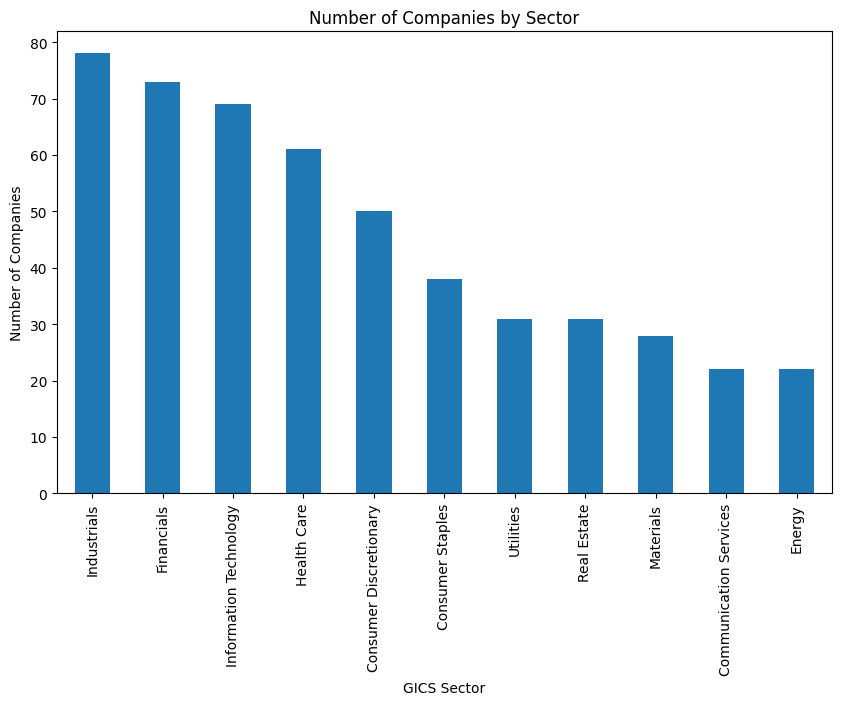

In [17]:
import matplotlib.pyplot as plt

# Bar chart of company counts by sector
sector_counts.plot(kind='bar', figsize=(10, 6), title="Number of Companies by Sector")
plt.ylabel("Number of Companies")
plt.show()


Page successfully fetched!


<ipython-input-18-9d81195d5b5f>:23: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


First 5 rows of the S&P 500 companies table:
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  
Data saved 

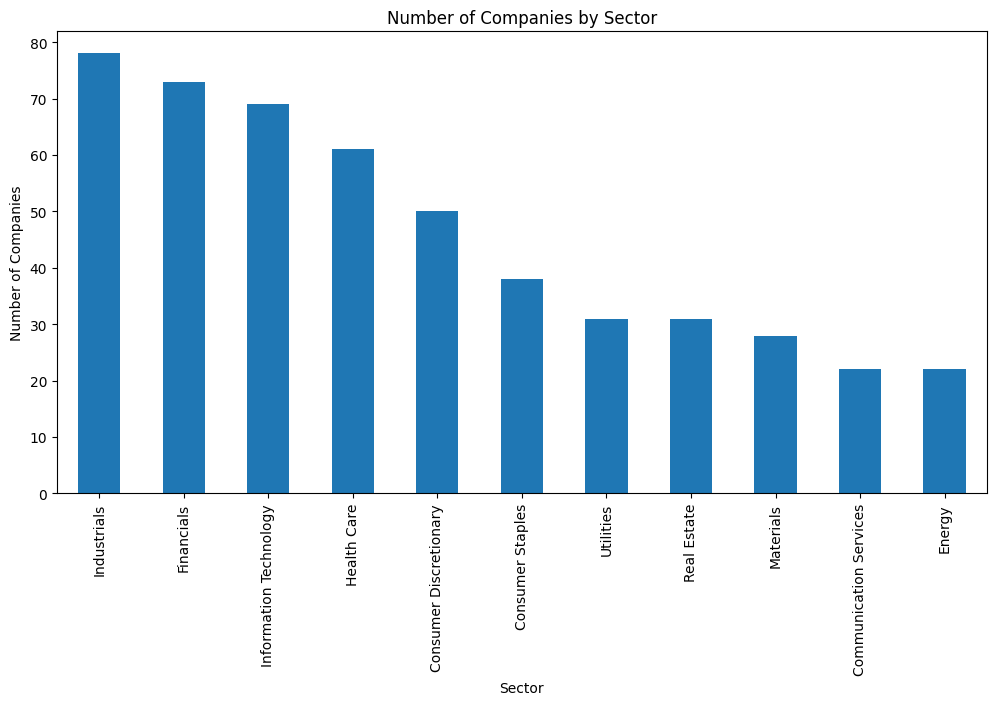

In [18]:
# Step 1: Import necessary libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 2: Define the URL of the page to scrape
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Step 3: Send an HTTP request to the URL
response = requests.get(url)
if response.status_code == 200:
    print("Page successfully fetched!")
else:
    print(f"Failed to fetch the page: {response.status_code}")

# Step 4: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Step 5: Extract the S&P 500 table
table = soup.find('table', {'id': 'constituents'})  # The main table of S&P 500 companies

# Step 6: Convert the table into a pandas DataFrame
df = pd.read_html(str(table))[0]

# Step 7: Display the first few rows of the DataFrame
print("First 5 rows of the S&P 500 companies table:")
print(df.head())

# Step 8: Save the data to a CSV file
df.to_csv('sp500_companies.csv', index=False)
print("Data saved as 'sp500_companies.csv'.")

# Step 9: Perform basic analysis (optional)
# Count companies by sector
sector_counts = df['GICS Sector'].value_counts()

# Display results
print("\nNumber of companies in each sector:")
print(sector_counts)

# Step 10: Plot the data (optional visualization)
import matplotlib.pyplot as plt

sector_counts.plot(kind='bar', figsize=(12, 6), title="Number of Companies by Sector")
plt.ylabel("Number of Companies")
plt.xlabel("Sector")
plt.show()


In [19]:
from google.colab import files
files.download('sp500_companies.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# Filter companies headquartered in New York
ny_companies = df[df['Headquarters Location'].str.contains("New York", na=False)]
print(f"Companies headquartered in New York:\n{ny_companies}")

# Filter companies headquartered in California
ca_companies = df[df['Headquarters Location'].str.contains("California", na=False)]
print(f"Companies headquartered in California:\n{ca_companies}")


Companies headquartered in New York:
    Symbol                              Security             GICS Sector  \
26     AXP                      American Express              Financials   
27     AIG          American International Group              Financials   
38     APO              Apollo Global Management              Financials   
64     BLK                             BlackRock              Financials   
65      BX                       Blackstone Inc.              Financials   
66      BK                            BNY Mellon              Financials   
71     BMY                  Bristol Myers Squibb             Health Care   
73      BR        Broadridge Financial Solutions             Industrials   
109      C                             Citigroup              Financials   
116     CL                     Colgate-Palmolive        Consumer Staples   
120     ED                   Consolidated Edison               Utilities   
121    STZ                  Constellation Brands   

In [22]:
# Search for Apple Inc.
apple = df[df['Security'] == 'Apple Inc.']
print(f"Details of Apple Inc.:\n{apple}")


Details of Apple Inc.:
   Symbol    Security             GICS Sector  \
39   AAPL  Apple Inc.  Information Technology   

                             GICS Sub-Industry  Headquarters Location  \
39  Technology Hardware, Storage & Peripherals  Cupertino, California   

    Date added     CIK Founded  
39  1982-11-30  320193    1977  


In [25]:
sorted_df = df.sort_values(by='Symbol')
print(f"Companies sorted by symbol:\n{sorted_df.head()}")


Companies sorted by symbol:
   Symbol              Security             GICS Sector  \
9       A  Agilent Technologies             Health Care   
39   AAPL            Apple Inc.  Information Technology   
3    ABBV                AbbVie             Health Care   
11   ABNB                Airbnb  Consumer Discretionary   
2     ABT   Abbott Laboratories             Health Care   

                             GICS Sub-Industry      Headquarters Location  \
9               Life Sciences Tools & Services    Santa Clara, California   
39  Technology Hardware, Storage & Peripherals      Cupertino, California   
3                                Biotechnology    North Chicago, Illinois   
11              Hotels, Resorts & Cruise Lines  San Francisco, California   
2                        Health Care Equipment    North Chicago, Illinois   

    Date added      CIK      Founded  
9   2000-06-05  1090872         1999  
39  1982-11-30   320193         1977  
3   2012-12-31  1551152  2013 (1888) 

In [26]:
top_by_sector = df.groupby('GICS Sector').head(5)
print("Top 5 companies from each sector:")
print(top_by_sector)


Top 5 companies from each sector:
    Symbol                         Security             GICS Sector  \
0      MMM                               3M             Industrials   
1      AOS                      A. O. Smith             Industrials   
2      ABT              Abbott Laboratories             Health Care   
3     ABBV                           AbbVie             Health Care   
4      ACN                        Accenture  Information Technology   
5     ADBE                       Adobe Inc.  Information Technology   
6      AMD           Advanced Micro Devices  Information Technology   
7      AES                  AES Corporation               Utilities   
8      AFL                            Aflac              Financials   
9        A             Agilent Technologies             Health Care   
10     APD                     Air Products               Materials   
11    ABNB                           Airbnb  Consumer Discretionary   
12    AKAM              Akamai Technologies

In [27]:
ny_companies.to_csv('ny_companies.csv', index=False)
print("Filtered data saved to 'ny_companies.csv'")


Filtered data saved to 'ny_companies.csv'


In [30]:
# Check for missing values
missing_data = df.isnull().sum()
print(f"Missing data in each column:\n{missing_data}")

# Drop rows with missing data (optional)
df_cleaned = df.dropna()
print(f"Cleaned dataset:\n{df_cleaned}")


Missing data in each column:
Symbol                   0
Security                 0
GICS Sector              0
GICS Sub-Industry        0
Headquarters Location    0
Date added               0
CIK                      0
Founded                  0
dtype: int64
Cleaned dataset:
    Symbol             Security             GICS Sector  \
0      MMM                   3M             Industrials   
1      AOS          A. O. Smith             Industrials   
2      ABT  Abbott Laboratories             Health Care   
3     ABBV               AbbVie             Health Care   
4      ACN            Accenture  Information Technology   
..     ...                  ...                     ...   
498    XYL           Xylem Inc.             Industrials   
499    YUM          Yum! Brands  Consumer Discretionary   
500   ZBRA   Zebra Technologies  Information Technology   
501    ZBH        Zimmer Biomet             Health Care   
502    ZTS               Zoetis             Health Care   

                